In [1]:
# Подключение необходимых библиотек и настройка окружения
import CoolProp.CoolProp as CP
import math
import CoolProp
from CoolProp.Plots import PropertyPlot
import matplotlib.pyplot as plt
from CoolProp.Plots.SimpleCycles import StateContainer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8) #размер графиков (в дюймах)

# Задача 1. 
Найти производство энтропии при смешении двух потоков с массовыми расходами $G_1 = 1 кг/с$ и $G_2 = 4 кг/с$, имеющих температуру $T_1 = 290K$ и $T_2 = 140K$ , а так же одинаковое давление p = 10 МПа. Газ - воздух.

In [2]:
# Дано
T1 = 260; G1 = 1
T2 = 150; G2 = 1
p = 5 * 10**6 #Па   ** - знак возведения в степень.
gas = 'Air'

Определим энтальпии по заданным $T_1$, $T_2$ и p, используя функцию PropsSI. 

In [3]:
h1 = CP.PropsSI('H','T',T1,'P',p,gas) # первый агрумент функции указывает что определить. Второй и четвертый 
h2 = CP.PropsSI('H','T',T2,'P',p,gas) # заданные параметры. Третий и пятый их значения. Шестой - для какого газа. 
print('h1 = %.2f Дж/кг, h2 = %.2f Дж/кг' % (h1,h2))

h1 = 371683.79 Дж/кг, h2 = 218234.35 Дж/кг


Определим параметры выходного потока из условий: 
$$G_1 + G_2 = G_3$$
$$G_1 \cdot h_1 + G_2 \cdot h_2 = G_3 \cdot h_3$$

In [4]:
G3 = G1+G2
h3 = (G1*h1 + G2*h2 ) / G3
print('h3 = %.2f Дж/кг' % h3)

h3 = 294959.07 Дж/кг


Определим $T_3$ 

In [5]:
T3 = CP.PropsSI('T','H',h3,'P',p,gas)
print('T3 = %.2fK' % (T3))

T3 = 195.71K


Определим изобарные теплоемкости входных потоков: 
$$C_{p1} = \frac {h1-h3} {T1-T3}$$

$$C_{p2} = \frac {h2-h3} {T2-T3}$$

In [6]:
Cp1 = (h1-h3) / (T1-T3)
Cp2 = (h2-h3) / (T2-T3)
print('Cp1 = %.2f Дж/(кгК) , Cp2 = %.2f Дж/(кгК)'% (Cp1,Cp2))

Cp1 = 1193.42 Дж/(кгК) , Cp2 = 1678.51 Дж/(кгК)


Определим производство энтропии:
$$ \Delta S' = G_1 \cdot C_{p1} \cdot ln(\frac {T3}{T1}) + G_2 \cdot C_{p2} \cdot ln(\frac {T3}{T2})$$

In [7]:
deltaS = G1*Cp1*math.log((T3/T1), math.e) + G2*Cp2*math.log((T3/T2), math.e)
print('deltaS = %.2f Дж/(с*К)' % (deltaS))

deltaS = 107.49 Дж/(с*К)


### Ответ: $\Delta S' = 443.29 \frac {Дж}{с \cdot К}$

# Задача 2
Для изотеpмического сжатия в компpессоpе пpи темпеpатуpе $T_1 = 300K$ от давления $p_1=0,25$ МПа до давления $p_2 = 25$ МПа опpеделить pаботу сжатия и отводимую пpи этом теплоту. Газ $N_2$.
Сделать pисунок с изобpажением площадей, пpопоpциональных искомым величинам.

In [8]:
# Дано
T1 = 350
p1 = 0.25 * 10**6 #Па
p2 = 25 * 10**6 #Па
gas = 'Nitrogen'

Определим значения энтропий для заданной температуры и давления газа:  

In [9]:
s1 = CP.PropsSI('S','T',T1,'P',p1,gas)
s2 =CP.PropsSI('S','T',T1,'P',p2,gas)
print('s1 = %.2f Дж/кгК, s2 = %.2f Дж/кгК' % (s1,s2))

s1 = 6733.56 Дж/кгК, s2 = 5277.22 Дж/кгК


Определим отводимую теплоту: $$q=T\Delta S = T(s_2-s_1)$$

In [10]:
q = T1 * (s2-s1)
print('q = %.2f Дж/кг' % (q))

q = -509717.26 Дж/кг


Знак минус говорит о том, что теплота отводится.
Определим значения энтальпий для заданных давлений и температуры:

In [11]:
h1 = CP.PropsSI('H','T',T1,'P',p1,gas)
h2 =CP.PropsSI('H','T',T1,'P',p2,gas)
print('h1 = %.2f Дж/кгК, h2 = %.2f Дж/кгК' % (h1,h2))

h1 = 363050.81 Дж/кгК, h2 = 339514.20 Дж/кгК


Определим работу сжатия: $$l_{сж} = q + (h_2 - h_1) = T(s_1-s_2) - (h_1 - h_2)$$

In [12]:
l = T1*(s1-s2) - (h1-h2)
print('l = %.2f дж/кг' % (l))

l = 486180.65 дж/кг


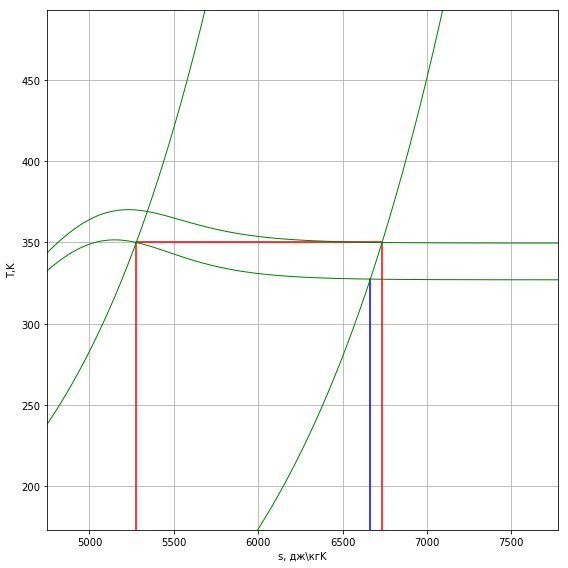

In [13]:
#Построение графика
plot = PropertyPlot(gas, 'ts',unit_system='SI',tp_limits='ACHP') #Полотно TS диаграммы в системе СИ
plot.calc_isolines(CoolProp.iP, [p1,p2],2) #Расчет изолиний(изобар), в пределах от p1 до p2 , в количестве двух штук
plot.calc_isolines(CoolProp.iHmass, [h1,h2], 2) #расчет изоэнтальп, в пределах от h1 до h2, в количестве двух штук
q_pl = StateContainer() #контейнер состояний(для отображения теплоты)
q_pl[2,'T'] = T1  # перечисление значений. (прим. для точки 2 значение Т равно Т1)
q_pl[2,'S'] = s2
q_pl[3,'S'] = s2
q_pl[3,'T'] = 0
q_pl[1,'T'] = T1
q_pl[1,'S'] = s1
q_pl[0,'S'] = s1
q_pl[0,'T'] = 0
plot.draw_process(q_pl) # рисует процесс. (красная линия - площадь равная теплоте)
_s = CP.PropsSI('S','H',h2,'P',p1,gas) #s в точке пересечения h2,p1
_t = CP.PropsSI('T', 'H',h2,'P', p1, gas) # T в точке пересечения h2,p1
l_p = StateContainer()
l_p[0,'T'] = 0;
l_p[0,'S'] = _s
l_p[1,'S'] = _s
l_p[1,'T'] = _t
plot.draw_process(l_p, line_opts={'color':'blue', 'lw':1.5}) 
plot.xlabel('s, дж\кгK')
plot.ylabel('T,K')
plot.grid()
plot.props[CoolProp.iHmass]['color'] = "green"
plot.props[CoolProp.iHmass]['lw'] = "1"
plot.props[CoolProp.iP]['color'] = "green"
plot.props[CoolProp.iP]['lw'] = "1"
# ax = plot.axis
# ax.text(7000, 400, 'p1', fontsize=15) #подпись p1 (первые два параметра - координаты на графике)
# ax.text(5500,400,'p2',fontsize = 15)
# ax.text(7000,305,'h1',fontsize = 15)
# ax.text(7000,255,'h2',fontsize = 15)
plot.show() # отображает плот.

*Теплота - площадь обведенная красной рамкой.

Площадь под изобарой p1 (криволинейная трапеция ограниченная синий линией) - разность энтальпий

Работа - Площадь красной - площадь синий. 

# Задача 3
Определить минимальную работу при охлаждении от температуры $T_1 = 290K$ до температуры $T_2 = 250K$ при изобарическом и изохорическом процессах, если известно давление $p_1 = 0.2$ МПа в начале процесса охлаждения. Температуру окружающей среды принять равной 300К. Сделать рисунок с изображением площадей пропорциональны искомым величинам. Газ - $N_2$

In [14]:
#Дано
T1 = 300; T2 = 250; T_os = 300
P1 = 0.2 * 10**6 #Па
gas = 'Nitrogen'

### Изобарный процесс
Для изобарического процесса определим по заданным температурам и давлению энтропии и энтальпию: 

In [15]:
s1 = CP.PropsSI('S', 'P',P1, 'T', T1, gas)
s2 = CP.PropsSI('S', 'P',P1, 'T', T2, gas)
print('s1 = %.2f Дж/кгК, s2 = %.2f Дж/кгК' % (s1,s2))

h1 = CP.PropsSI('H', 'P',P1, 'T', T1, gas)
h2 = CP.PropsSI('H', 'P',P1, 'T', T2, gas)
print('h1 = %.2f Дж/кг, h2 = %.2f Дж/кг' % (h1,h2))

s1 = 6639.24 Дж/кгК, s2 = 6448.99 Дж/кгК
h1 = 310975.85 Дж/кг, h2 = 258803.60 Дж/кг


Определим минимальную работу: $$l_{min} = T_{oc}\cdot(s_1-s_2)-(h_1-h_2)$$

In [16]:
l_min = T_os*(s1-s2) - (h1-h2)
print('l_min = %.2f Дж/кг' % (l_min))

l_min = 4901.57 Дж/кг


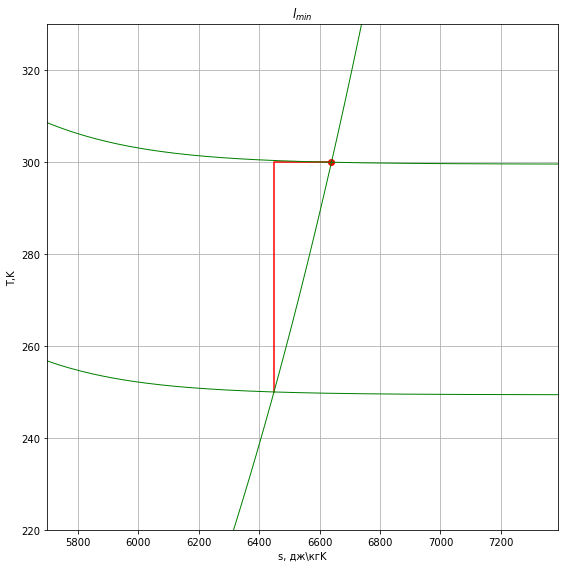

In [17]:
plot = PropertyPlot(gas, 'ts',unit_system='SI',tp_limits='ACHP') 
plot.calc_isolines(CoolProp.iP, [P1],1) 
plot.calc_isolines(CoolProp.iHmass, [h1,h2], 2)
l_pl = StateContainer()
l_pl[0,'T'] = T1
l_pl[0,'S'] = s1
l_pl[1,'T'] = T_os
l_pl[1,'S'] = s1
l_pl[2,'T'] = T_os
l_pl[2,'S'] = s2
l_pl[3,'T'] = T2
l_pl[3,'S'] = s2
plot.draw_process(l_pl) # рисует процесс. (красная линия - площадь равная l_min)
plot.set_axis_limits([s2-750,s1+750,T2-30,T_os+30]) # задает пределы плота [x1,x2, y1,y2]
plot.title(r'$l_{min}$ ')
plot.xlabel('s, дж\кгK')
plot.ylabel('T,K')

plot.grid()
# ax = plot.axis
# ax.text(6700, 315, 'p1', fontsize=15) #подпись p1 (первые два параметра - координаты на графике)
# ax.text(7000,290,'h1',fontsize = 15)
# ax.text(7000,250,'h2',fontsize = 15)
plot.show() # отображает плот.

### Изохорный процесс:
$h_1 = 300545.81$ Дж/кг $s_1 = 6603.88$ Дж/кгК (см. изобарный процесс)
Определим величину удельного объема( v = $\frac 1 {\rho}$)

In [18]:
D1 = CP.PropsSI('D', 'H',h1, 'S', s1, gas) #D - density - плотность
v1 = 1/D1
print('v1 = %.2f м^3/кг' % v1)

v1 = 0.45 м^3/кг


По вычисленному значению плотности определим значение энтальпии и энтропии в конце процесса: 

In [19]:
h_2 = CP.PropsSI('H', 'D',D1, 'T', T2, gas)
print("h2 = %.2f Дж/кг" % h2)
s_2 = CP.PropsSI('S', 'D',D1, 'T', T2, gas)
print("s2 = %.2f Дж/кгК"% s2)

h2 = 258803.60 Дж/кг
s2 = 6448.99 Дж/кгК


Определим давление $p_2$, $v_2 = v_1$ (т.к изохорный процесс), 

In [20]:
P2 = CP.PropsSI('P', 'H',h_2, 'S', s_2, gas)
print('p_2 = %.2f Па' % P2)
D2 = CP.PropsSI('D', 'H',h_2, 'S', s_2, gas)
v2 = 1/D2

p_2 = 166507.88 Па


Определим $u_1$ , $u_2$ по формулам: 
$$u_1 = h_1 - p_1 \cdot v_1$$

$$u_2 = h_2 - p_2 \cdot v_2$$

А так же проверим данное значение функцией PropsSI (по известным $h_1,s_1$; $h_2,s_2$)

In [21]:
u1 = h1 - P1*v1
u2 = h_2 - P2*v2
print('u1 = %.2f Дж/кг; u2 = %.2f Дж/кг' % (u1,u2))
u_1  = CP.PropsSI('U', 'H',h1,'S',s1,gas)
u_2  = CP.PropsSI('U', 'H',h_2,'S',s2,gas)
print('u_1 = %.2f Дж/кг; u_2 = %.2f Дж/кг' % (u_1,u_2))

u1 = 221966.40 Дж/кг; u2 = 184807.36 Дж/кг
u_1 = 221966.40 Дж/кг; u_2 = 184795.83 Дж/кг


Определим минимальную работу: 
$$l_{min} = l_K - l_{дет}$$
$$l_K = T_0 \cdot (s_1 - s_2)$$
$$l_{дет} = u_1 - u_2$$ 

In [22]:
l_min_v = T_os*(s1-s_2) - (u1-u2)
print('l_min = %.2f Дж/кг' % l_min_v)

l_min = 3490.05 Дж/кг


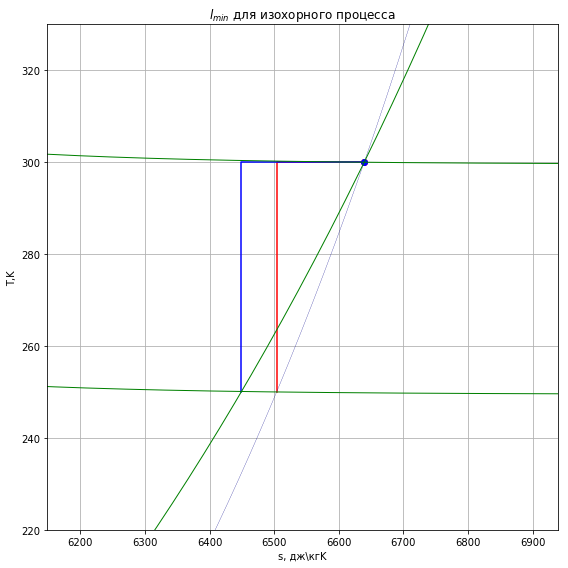

In [23]:
plot = PropertyPlot(gas, 'ts',unit_system='SI',tp_limits='ACHP') 
plot.calc_isolines(CoolProp.iDmass, [D1],1) 
plot.calc_isolines(CoolProp.iP, [P1],1) 
plot.calc_isolines(CoolProp.iHmass, [h1,h_2], 2)
l_pl_v = StateContainer()
l_pl_v[0,'T'] = T1
l_pl_v[0,'S'] = s1
l_pl_v[1,'T'] = T_os
l_pl_v[1,'S'] = s1
l_pl_v[2,'T'] = T_os
l_pl_v[2,'S'] = s_2
l_pl_v[3,'T'] = T2
l_pl_v[3,'S'] = s_2
plot.draw_process(l_pl_v) # рисует процесс. (красная линия - площадь равная l_min)
plot.draw_process(l_pl, line_opts={'color':'blue', 'lw':1.5}) # изобарный процесс
plot.set_axis_limits([s2-300,s1+300,T2-30,T_os+30]) # задает пределы плота [x1,x2, y1,y2]
plot.title(r'$l_{min}$ для изохорного процесса')
plot.xlabel('s, дж\кгK')
plot.ylabel('T,K')
plot.grid()
# ax = plot.axis
# ax.text(6450, 230, 'v1', fontsize=15) #подпись v1 (первые два параметра - координаты на графике)
# ax.text(6700, 315, 'p1', fontsize=15) #подпись p1 (первые два параметра - координаты на графике)
# ax.text(6800,290,'h1',fontsize = 15)
# ax.text(6800,250,'h2',fontsize = 15)
# ax.text(6200,320,"синяя линия - изобарный процесс", fontsize = 10)
# ax.text(6200,315,"красная линия - изохорный процесс", fontsize = 10)
plot.show() # отображает плот.

#### Ответ: 
Минимальная работа в изобарном процессе : $l_{min} = 4723.77 Дж/кг$ 

Минимальная работа в изохорном процессе : $l_{min} = 3363.43 Дж/кг$

# Задача 4 
Найти температуры потоков на выходе из противоточного теплообменника, если на входе: первый поток имеет температуру $Т_1=300$ К, давление $Р_1=0,5$ МПа, массовый расход $G_1=10$ кг/с, второй поток – соответственно $Т_2=100$ К, $Р_2=1$ МПа и $G_2=9$ кг/с. Потерями давления и влиянием фонового теплопритока пренебречь, минимальная недорекуперация на одном из концов теплообменника составляет 5К. Поток 1 - $O_2$. Поток 2 - $N_2$

In [24]:
#Дано
T1 = 350; T2 = 150
gas1 = 'Air'; gas2 = 'Nitrogen'
P1 = 0.5 * 10**6 #Па
P2 = 1 * 10**6 #Па
G1 = 10; G2 = 9
dT = 5 #недорекуперация 

Определим изобарные теплоемкости $C_{p1}$ и $C_{p2}$

In [25]:
Cp1 = CP.PropsSI('CPMASS', 'P',P1, 'T', T1, gas1)
Cp2 = CP.PropsSI('CPMASS', 'P',P2, 'T', T2, gas2)
print("Cp1 = %.2f Дж/кгК, Cp2 = %.2f Дж/кгК" % (Cp1,Cp2))

Cp1 = 1013.57 Дж/кгК, Cp2 = 1147.98 Дж/кгК


Водные эквивалентны:
$$W_1 = C_{p1} \cdot G_1$$

$$W_1 = C_{p2} \cdot G_2$$

In [26]:
W1 = Cp1*G1; W2 = Cp2*G2
print('W1 = %.2f Дж/(К*с), W2 = %.2f Дж/(К*с)' % (W1,W2))

W1 = 10135.72 Дж/(К*с), W2 = 10331.81 Дж/(К*с)


Правило задания недорекуперации для двухпоточного противоточного теплообменника: Если водяной эквивалент прямого потока больше, чем обратного, то недорекуперацию задаём на тёплом конце теплообменника. В данном случае недорекуперация задается на холодном конце теплообменника. ( $W_2 > W_1$ )

Тогда: $T_3 = T_2 - \Delta T$

Энергетический баланс: $W_1 \cdot (T_1 - T_3) = W_2 \cdot (T_2 - T_4)$

Откуда $T_4 = T_2 + \frac {W_1}{W_2} \cdot (T_1 - T_3)$

In [27]:
T3 = T2 + dT
T4 = T2 + (W1/W2) * (T1 - T3)
print("T3 = %.2f K, T4 = %.2f K" % (T3,T4))

T3 = 155.00 K, T4 = 341.30 K


#### Ответ: 
$T_3 = 105K$ ; $T_4 = 187.06K$

# Задача 5
Определить совершенную удельную работу и температуру в конце изоэнтропного и изоэнтальпного расширений, используя таблицы или диаграммы реальных свойств веществ. Для процесса изоэнтропного расширения также использовать уравнение адиабаты Пуассона для идеального газа. Известно давление в начале $Р_1=2,5$ МПа и конце $Р_2=0,2$ МПа процесса расширения и диапазон температур для начала процесса расширения $Т_1=250..300$ К. Построить графики зависимостей изменения перепада температур и удельной работы в процессах расширения от начальной температуры расширения, используя при этом не менее пяти точек. 

Газ - $N_2$. Показатель адиабаты k=1.4. Степень сжатия $\epsilon = \frac{P_2}{P_1}$

In [28]:
# Дано
P1 = 2.5 * 10**6 #Па
P2 = 0.2 * 10**6 #Па
gas = 'Neon'
T1max = 150
T1min = 100
k = 1.64 # Показатель адиабаты для **неона
eps = P2/P1 #Степень сжатия
print("eps = ", eps)

eps =  0.08


### Изоэнтропный процесс

По уравнению Пуассона вычислим $T_2$:
$$T_2 = T_1 \cdot \epsilon^{\frac{k-1}{k}}$$

In [29]:
T1 = [x for x in range(T1min,T1max+10,10)] #Создаем список T1 от минимального до максимального значения с шагом 10
T2 = []
for t in T1: #Перебирает все элементы списка T1 и для каждого выполняет команду:
    T2.append( t * eps**( (k-1)/k ) ) # добавляет в конец списка значение внутри скобок
print('T2 = [', end = ' ')
for t in T2:
    print('%.2f'%t, end = '; ')
print(']')

T2 = [ 37.32; 41.05; 44.78; 48.52; 52.25; 55.98; ]


Теперь определим энтальпию в начале и в конце процесса по известным $T_1, T_2$ и $P_1, P_2$. 

In [30]:
h1 = []; h2 = [];
print('h1 = [', end = ' ')
for t in T1:
    tmp = CP.PropsSI('H', 'P',P1, 'T', t, gas)
    h1.append( tmp )
    print('%.2f'%tmp, end = '; ')
print('] Дж/кг')
print('h2 = [', end = ' ')
for t2 in T2:
    tmp = CP.PropsSI('H', 'P',P2, 'T', t2, gas)
    h2.append( tmp )
    print('%.2f'%tmp, end = '; ')
print('] Дж/кг')

h1 = [ 158601.13; 169632.83; 180524.59; 191313.76; 202025.11; 212675.80; ] Дж/кг
h2 = [ 96317.03; 100428.80; 104473.38; 108474.14; 112444.53; 116392.91; ] Дж/кг


Работа при изоинтропном расширении: $$l_s = h_1 - h_2$$

In [31]:
l_s = []
print('l_s = [', end = ' ')
for i,j in zip(h1,h2): # i - элемент h1, j - элемент h2. 
    l_s.append(i-j) 
    print('%.2f' % (i-j), end = '; ')
print('] Дж/кг')

l_s = [ 62284.10; 69204.04; 76051.21; 82839.62; 89580.58; 96282.90; ] Дж/кг


Изменение температуры $\Delta T = T_1 - T_2$ 

In [32]:
deltaT = []
print('deltaT = [', end = ' ')
for i,j in zip(T1,T2): # i - элемент T1, j - элемент T2. 
    deltaT.append(i-j) 
    print('%.2f' % (i-j), end = '; ')
print('] K')

deltaT = [ 62.68; 68.95; 75.22; 81.48; 87.75; 94.02; ] K


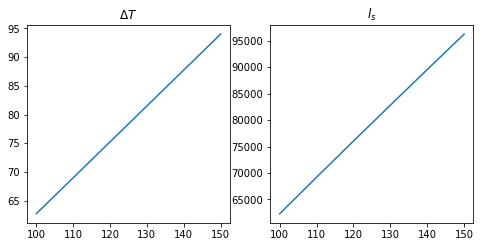

In [33]:
plt.subplot(221)
plt.plot(T1, deltaT)
plt.title(r"$\Delta T$")
plt.subplot(222)
plt.plot(T1,l_s)
plt.title(r"$l_s$")
plt.show()

### Изоэнтальпный процесс
Энтальпии в начале и в конце процесса равны $h_1 = h_2$ 
Определим $T_2$ по известному давлению $P_2$ и энтальпии $h_1$

In [34]:
h2 = h1
T2 = []
print("T2 = [", end = ' ')
for h in h1:
    tmp = CP.PropsSI('T', 'H',h, 'P', P2, gas)
    T2.append(tmp)
    print("%.2f" % tmp, end = '; ')
print('] K ')

T2 = [ 96.43; 107.08; 117.60; 128.03; 138.39; 148.70; ] K 


Найдем значение удельного объема вещества $$V_1 = 1 / \rho_1$$
$$V_2 = 1 / \rho_2$$

In [35]:
V1=[]
print('V1 = [', end=' ')
for h in h1:
    tmp = 1/CP.PropsSI('D', 'H',h, 'P', P1, gas)
    V1.append( tmp )
    print('%.4f'%tmp, end = '; ')
print('] м3/кг')
V2=[]
print('V2 = [', end=' ')
for h in h1: 
    tmp = 1/CP.PropsSI('D', 'H',h, 'P', P2, gas)
    V2.append( tmp )
    print('%.4f'%tmp, end = '; ')
print('] м3/кг')

V1 = [ 0.0163; 0.0181; 0.0198; 0.0215; 0.0233; 0.0250; ] м3/кг
V2 = [ 0.1984; 0.2205; 0.2423; 0.2638; 0.2853; 0.3066; ] м3/кг


Работа равна изменению внутренней энергии : $$l_h = p_1 \cdot v_1 - p_2 \cdot v_2 $$

In [36]:
l_h = []
print('l_h = [', end = ' ')
for i,j in zip(V1,V2):
    tmp = P1*i - P2*j
    l_h.append(tmp)
    print('%.2f'%tmp, end = '; ')
print('] Дж/кг')

l_h = [ 1062.47; 1074.04; 1083.10; 1089.80; 1094.43; 1097.30; ] Дж/кг


In [37]:
deltaT = []
print('deltaT = [', end = ' ')
for i,j in zip(T1,T2): # i - элемент T1, j - элемент T2. 
    deltaT.append(i-j) 
    print('%.2f' % (i-j), end = '; ')
print('] K')

deltaT = [ 3.57; 2.92; 2.40; 1.97; 1.61; 1.30; ] K


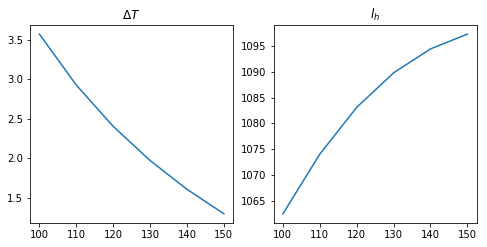

In [38]:
plt.subplot(221)
plt.plot(T1, deltaT)
plt.title(r"$\Delta T$")
plt.subplot(222)
plt.plot(T1, l_h)
plt.title(r"$l_h$")
plt.show()

# Задача 6

Определить совершенную удельную работу и температуру в конце изоэнтропного и изоэнтальпного расширения, используя таблицы или диаграммы реальных свойств веществ. Для процесса изоэнтропного расширения также использовать уравнение адиабаты Пуассона для идеального газа. Известна температура $Т_1 = 300К$ в начале процесса расширения, диапазон давлений начала процесса $Р_1 = 0.5..5$ МПа. Степень расширения равна 2,5. Построить графики зависимостей изменения перепада температур и удельной работы в процессах расширения от начального давления расширения, используя при этом не менее пяти точек.Газ - $N_2$

In [39]:
#Дано
T1 = 300
P1max = 5 * 10**6 #Па
P1min = 5 * 10**5 #Па
gas = 'Neon'
k = 1.64 # показатель адиабаты
eps = 2.5 # коэффициент расширения! 

### Изоэнтропный процесс
Определим $T_2$ по уравнению Пуассона: $$T_2 = T_1 \cdot \epsilon^{ \frac{k-1}{k}}$$

In [40]:
T2 = T1*(1/eps)**((k-1)/k) # 1/eps тк здесь стоит коэффициент сжатия.
print("T2 = %.2f K" % T2)

T2 = 209.81 K


Зададим измение $P_1$ , вычислим $P_2 = \frac {P_1}{2.5}$.
По известным $P_1, P_2$ и $T_1 , T_2$ определим значения энтальпий

In [41]:
P1 = []
P1 = [x for x in range(P1min,P1max+5*10**5,5*10**5)] # задаем диапозон измения P1
P2 = []
for p in P1:
    P2.append(p/eps) # вычисляем P2
print('P1 = ',P1, 'Па')
print('P2 = ', P2, 'Па')
print(P2)
h1 = []
print('h1 = [', end = '')
for p in P1:
    tmp = CP.PropsSI('H', 'P',p, 'T', T1, gas)
    h1.append(tmp)
    print('%.2f'%tmp, end = ' ')
print(']Дж/кг')
h2 =[]
print('h2 = [', end = '')
for p in P2:
    tmp = CP.PropsSI('H', 'P',p, 'T', T2, gas)
    h2.append(tmp)
    print('%.2f'%tmp, end = ' ')
print(']Дж/кг')

P1 =  [500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000] Па
P2 =  [200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0, 1400000.0, 1600000.0, 1800000.0, 2000000.0] Па
[200000.0, 400000.0, 600000.0, 800000.0, 1000000.0, 1200000.0, 1400000.0, 1600000.0, 1800000.0, 2000000.0]
h1 = [368805.31 368964.63 369124.99 369286.41 369448.91 369612.49 369777.18 369942.97 370109.89 370277.93 ]Дж/кг
h2 = [275732.82 275720.72 275709.10 275697.97 275687.32 275677.17 275667.51 275658.35 275649.69 275641.53 ]Дж/кг


Работа при изоинтропном расширении: $$l_s = h_1 - h_2$$
Изменение температуры $\Delta T = T_1 -T_2 = 69.1K$ 

In [42]:
l_s = []
print('l_s = [', end = ' ')
for i,j in zip(h1,h2): # i - элемент h1, j - элемент h2. 
    l_s.append(i-j) 
    print('%.2f' % (i-j), end = '; ')
print('] Дж/кг')
deltaT = T1 - T2

l_s = [ 93072.49; 93243.91; 93415.89; 93588.44; 93761.59; 93935.32; 94109.67; 94284.63; 94460.20; 94636.41; ] Дж/кг


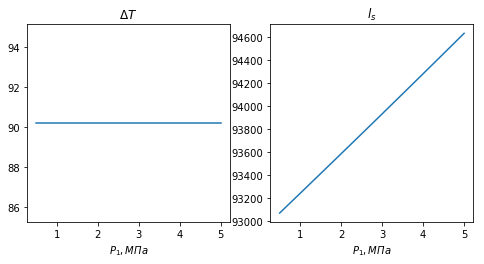

In [43]:
dt = []
p1 = []
for x in P1:
    p1.append(x/10**6)
for x in range(10):
    dt.append(deltaT)
plt.subplot(221)
plt.plot(p1, dt)
plt.title(r"$\Delta T$")
plt.xlabel(r'$P_1 , МПа$')
plt.subplot(222)
plt.plot(p1,l_s)
plt.xlabel(r'$P_1 , МПа$')
plt.title(r"$l_s$")
plt.show()

### Изоэнтальпный процесс
Значения энтальпии $h_2$ берем из первой части(из изоэнтропного процесса)
Затем по известным значениям энтальпии и давления определяем температуру $T_2$

In [44]:
h2 = h1
T2=[]
print('T2 = [', end ='')
for i in range(10):
    tmp = CP.PropsSI('T', 'H',h1[i], 'P', P2[i], gas)
    T2.append(tmp)
    print('%.2f' % tmp, end = ' ')
print(']K')

T2 = [300.09 300.19 300.28 300.37 300.47 300.57 300.66 300.76 300.86 300.96 ]K


Определим удельный объем по известным энтальпиям и давлениям

In [45]:
V1=[]
for i in range(10):
    V1.append(1/CP.PropsSI('D', 'H',h1[i], 'P', P1[i], gas) )
V2=[]
for i in range(10):
    V2.append(1/CP.PropsSI('D', 'H',h1[i], 'P', P2[i], gas) )
#########################################################################
def printList(l, name, razmer):    # функция печатающая список значений...
    print(name+' = [', end = '')
    for i in l:
        print('%.3f'% i, end=' ')
    print(']'+razmer)
#########################################################################
printList(V1,'V1','м3/кг')
printList(V2,'V2','м3/кг')

V1 = [0.248 0.124 0.083 0.062 0.050 0.042 0.036 0.031 0.028 0.025 ]м3/кг
V2 = [0.619 0.310 0.207 0.155 0.124 0.104 0.089 0.078 0.069 0.063 ]м3/кг


Определим работу как изменение внутренней энергии: $$l_h = p_1 \cdot v_1 - p_2 \cdot v_2$$

In [46]:
l = []
for i in range(10):
    l.append(P1[i]*V1[i]- P2[i]*V2[i])
printList(l,'l_h', 'Дж/кг')

l_h = [137.382 274.779 412.197 549.642 687.118 824.630 962.181 1099.773 1237.411 1375.095 ]Дж/кг


Изменение температуры по формуле Пуассона: $$\Delta T = T_1 \cdot (1-\epsilon^{\frac {k-1}{k}})$$

In [47]:
dT = []
for i in range(10):
    dT.append(T1*(1-0.4**((k-1))/k))
printList(dT,'deltaT', 'K')

deltaT = [198.236 198.236 198.236 198.236 198.236 198.236 198.236 198.236 198.236 198.236 ]K


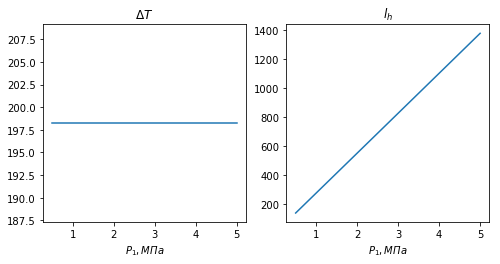

In [48]:
plt.subplot(221)
plt.plot(p1, dT)
plt.title(r"$\Delta T$")
plt.xlabel(r'$P_1 , МПа$')
plt.subplot(222)
plt.plot(p1,l)
plt.xlabel(r'$P_1 , МПа$')
plt.title(r"$l_h$")
plt.show()